# Линейная регрессия

Линейная регрессия является одним из базовых алгоритмов для многих областей, связанных с анализом данных. 

Линейная регрессия — используемая в статистике регрессионная модель зависимости объясняемой переменной $y$ от другой или нескольких других переменных (факторов) $x$ с линейной функцией зависимости:

$$y = b_0 + b_1 x_1 + \dots + b_k x_k + \varepsilon.$$
Здесь $\varepsilon$ — ошибка модели — нормально распределённая случайная величина с нулевым математическим ожиданием и постоянной дисперсией.

Парная регрессия — частный случай линейной регрессии, когда рассматривается только один признак (т.е. $k = 1$). Для парной регрессии коэффициенты вычисляются по формулам:

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$
Здесь $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее.





### Пример 1

Рассмотрим данные со значениями площадей квартир в квадратных метрах (массив x1) и соответствующими им ценами на квартиры в тысячах долларов (массив y1), приведеннные для 12 наблюдений. По этим данным построим модель линейной регрессии.

In [2]:
import numpy as np

In [3]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100], dtype=np.float64)
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165], dtype=np.float64)


Найдём коэффициенты линейной регрессии:

In [4]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b1

0.8717472118959082

In [5]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

77.89962825278835


Итак, модель линейной регрессии имеет вид:

$$y = 77.9 + 0.87 \cdot x,$$
т.е. с увеличением площади квартиры на 1 квадратный метр цена возрастет на 0.87 тысячи долларов. Визуализируем полученные результаты на графике:

In [6]:
from matplotlib import pyplot as plt

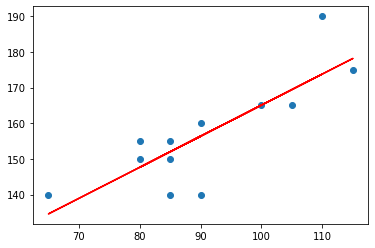

In [7]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

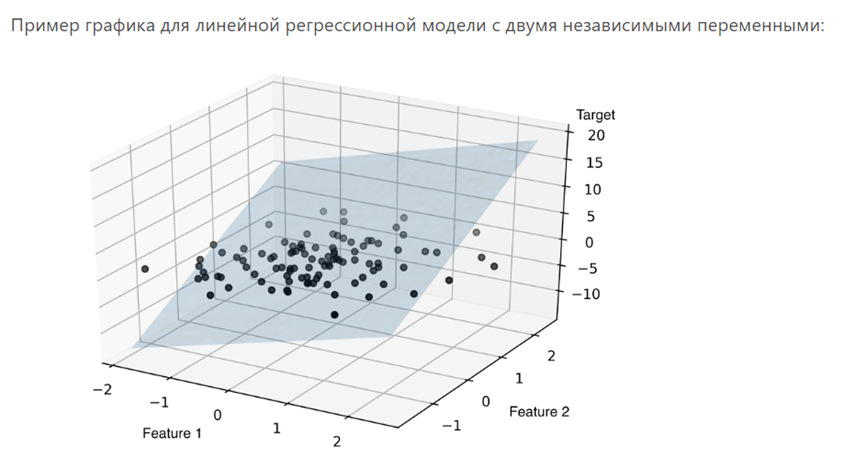

В общем случае, когда факторов больше одного, в некоторых ситуациях удаётся также найти аналитическое решение. 

Чтобы записать это решение, перейдём к матричной форме записи линейной регрессии. Для удобства введём дополнительный "фактор" $x_0 = 1$. Это позволит записать уравнение регрессии в более компактном виде:

$$y = x \cdot b + \varepsilon,$$

где 
$b = \left(
\begin{array}{c}
b_0 \\
\vdots \\
b_k
\end{array}
\right)$ - столбец коэффициентов регрессии,
$x = \left( x_0, \dots, x_k \right)$ - строка факторов.

Пусть теперь у нас имеется $m$ реальных наблюдений, т.е. $m$ различных строк $x$ и $m$ различных значений $y$. 
Эти наблюдения удобно записывать в виде т.н. __матрицы объект-признак__ $X$ и столбца целевого признака. Зафиксируем следующие обозначения:





$$X = \left(
\begin{array}{ccc}
x_{10} & \dots & x_{1k} \\
x_{20} & \dots & x_{2k} \\
\vdots & \ddots & \vdots \\
x_{m0} & \dots & x_{mk}
\end{array}
\right), \: 
y = \left(
\begin{array}{c}
y_1 \\
\vdots \\
y_m
\end{array}
\right).$$

В матрице $X$ размера $m \times (k + 1)$ каждая строка соответствует одному наблюдению, т.е. содержит в себе $k + 1$ значений соответствующих факторов (включая фиктивный фактор с индексом 0). $i$-му наблюдению соответствует значение в $i$-й строке из $y$.

В этих обозначениях задача линейной регрессии состоит в том, чтобы решить систему уравнений:

$$X \cdot b = y$$

с вектором переменных $b$. 

Для такой задачи возможно записать аналитическое решение:

$$b = (X^\top X)^{-1} X^\top y.$$

Проблема такого решения заключается в том, что в общем случае определитель матрицы $X^\top X$ может быть очень близок к 0, и из-за этого усложняется задача вычисления обратной матрицы.

Чаще всего такая система не имеет решений.
Причиной тому является шум, который присутствует практически в любых реальных данных. Так же причиной может быть отсутствие линейной зависимости как таковой, с которой можно пытаться бороться введением дополнительных переменных, нелинейно зависящих от исходных.



Поэтому задача состоит в минимизации расстояния между векторами $X \cdot b$ и $y$. Такой подход называется __методом наименьших квадратов__:


$f(x) = \sum_{i \in [1, m]} (y_i-b_ix)^2$

$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$


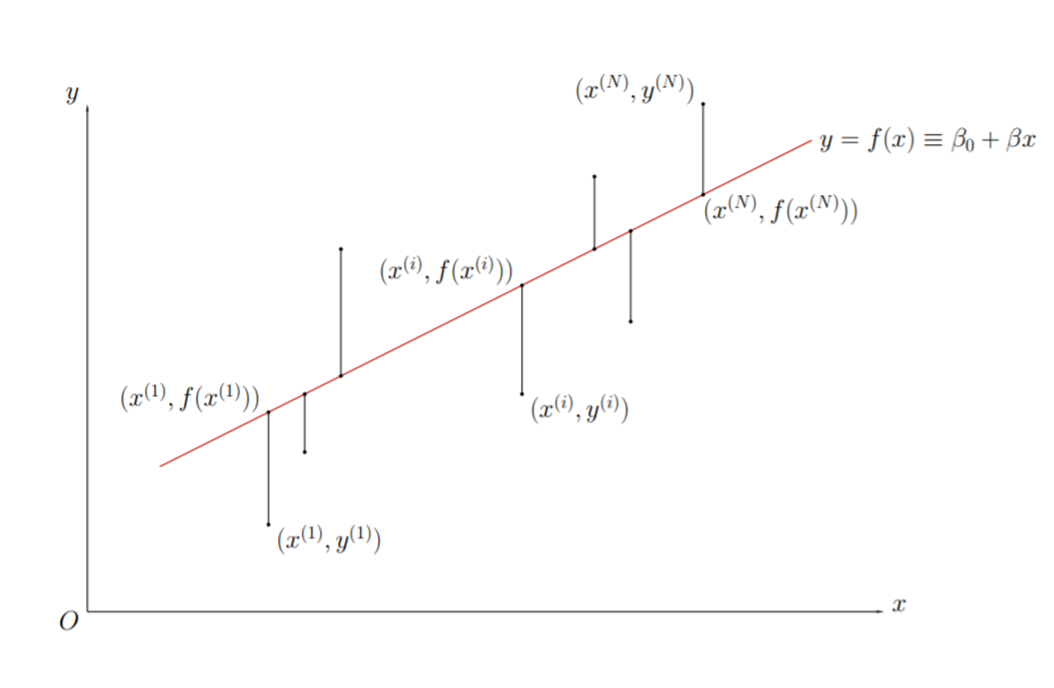





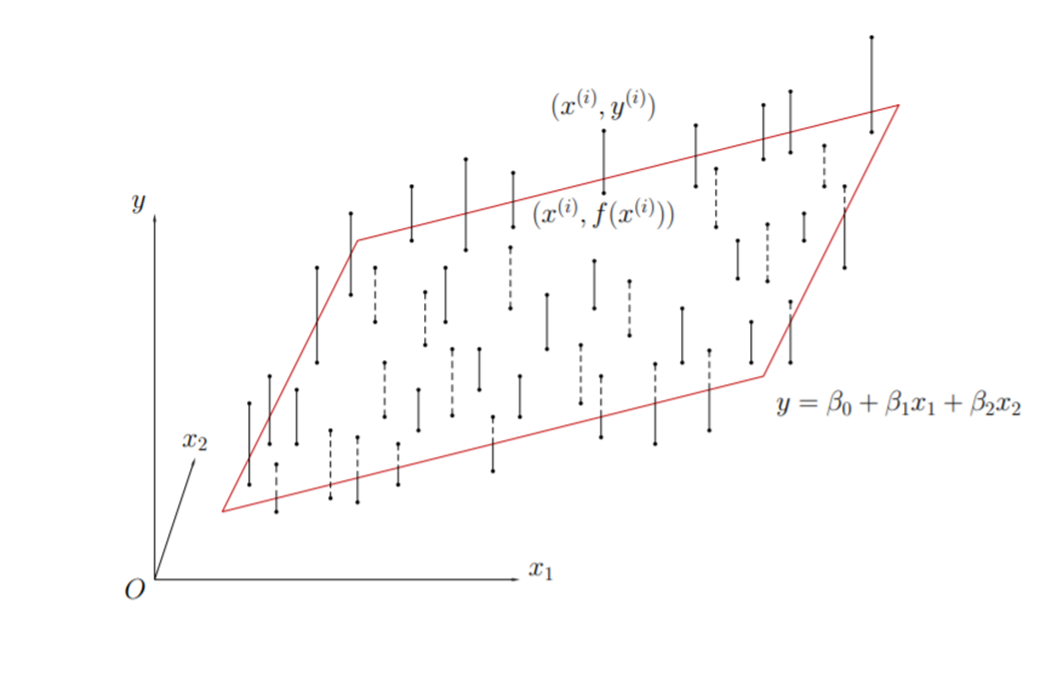

Задача нахождения минимума решается  с помощью градиентного спуска или используются матричные методы решения минимацзации, основанные на разложении матриц (QR, LSQR).



__Пример 2__

Рассмотрим данные о хоккеистах и попробуем построить модель регрессии, которая будет предсказывать возраст хоккеиста по его росту и весу.


import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])

In [4]:
x2 = df[['height', 'weight']].values
y2 = df['age'].values.reshape(-1, 1)

In [5]:
y2

array([[24.95277207],
       [21.11978097],
       [25.229295  ],
       ...,
       [26.82546201],
       [26.01232033],
       [20.39698836]])

К матрице  𝑋  (массив x2) нужно также добавить столбец из 1, соответствующий фиктивному фактору.

In [7]:
x2.shape

(3294, 2)

In [10]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [11]:
x2

array([[  1., 185.,  84.],
       [  1., 188.,  86.],
       [  1., 182.,  95.],
       ...,
       [  1., 191.,  88.],
       [  1., 188.,  89.],
       [  1., 193.,  95.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [12]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

27479241781874.695

In [13]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[50.41616613]
 [-0.21077511]
 [ 0.16818038]]


Итак, наша модель регрессии имеет вид:

$$y = 50.4162 - 0.2108 \cdot x_1 + 0.1682 \cdot x_2,$$

где $x_1$ - рост хоккеиста, $x_2$ - вес хоккеиста.

Для оценки качества модели линейной регрессии можно использовать __коэффициент детерминации__. Этот коэффициент представляет собой долю дисперсии переменной $y$, которая _объясняется_ моделью. Он обозначается $R^2$ и принимает значения между 0 и 1.

Допустим, имеется датасет из пар $(x_i, y_i)$, и построена модель парной регрессии с коэффициентами $b_0$, $b_1$. Обозначим переменной $z$ “предсказания” регрессионной модели: 

$$z_i = b_0 + b_1 x_i.$$

Тогда дисперсию объясняемой переменной y и дисперсию модели можно посчитать следующим образом:

$$D_y = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n (y_i - \overline{y})^2, \:
D_{model} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n (z_i - \overline{z})^2.$$

Коэффициент детерминации тогда считается следующим образом:

$$R^2 = \dfrac{D_{model}}{D_y}.$$

Коэффициент детерминации можно также посчитать как квадрат коэффициента корреляции между объясняемой переменной $y$ и “предсказанной” переменной $z$:

$$R^2 = r_{yz}^2.$$

В случае парной регрессии это значение сводится к корреляции между переменными $x$ и $y$:

$$R^2 = r_{xy}^2.$$


__Пример 3__

Посчитаем коэффициент детерминации для модели из примера 1. Для этого создадим массив из предсказанных значений:

In [11]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: [150. 160. 155. 175. 140.]
pred: [147.6394052  156.35687732 151.99814126 178.15055762 151.99814126]


Итак, коэффициент детерминации:

In [12]:
R1 = z1.var() / y1.var()
R1

0.6752261641274645

Коэффициент детерминации, равный $0.6752$, означает, что $67 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $33 \%$ обусловлены какими-то ещё факторами, которые модель не учла.



# Задача классификации

Задача классификации заключается в том, чтобы отнести каждый из объектов выборки к какому-либо классу из данного набора.

Более формально, нам нужно построить классификатор - функцию $a \colon X \rightarrow Y$, которая поставит в соответствие каждому объекту $x$ из пространства объектов $X$ какой-либо класс $y$ из пространства ответов $Y$, где в случае $Y$ - это какое-то конечное множество. То есть, если мы рассмотрим какой-то объект выборки $x$, мы должны получить для него ответ $y = a(x)$.

Задачи классификации можно поделить на два типа: бинарная классификация и многоклассовая классификация. В задаче бинарной классификации у нас всего лишь два класса, и множество $Y$ содержит всего два элемента. В задаче же многоклассовой классификации классов больше, чем два.

Примеры задач бинарной классификации:

пассажиры с Титаника: выжил ли пассажир? (множество $X$ - пассажиры, множество $Y$ - выжил/нет)
отдаст ли клиент кредит банку? (множество $X$ - клиенты, множество $Y$ - отдаст/нет)
является ли отзыв к товару положительным? (множество $X$ - отзывы, множество $Y$ - положительный/отрицательный)
Примеры задач многоклассовой классификации:

какое заболевание у пациента? (множество $X$ - пациенты, множество $Y$ - возможные заболевания)
автоматическое распознавание символов в рукописном тексте (множество $X$ - выделенные в тексте символы, множество $Y$ - словарь символов)
к какому жанру относится данный художественный текст? (множество $X$ - тексты, множество $Y$ - жанры)


Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.

Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры). Один из самых простых линейных классификаторов получается на основе регрессии вот таким образом:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$
где

$\textbf{x}$ – вектор признаков примера (вместе с единицей);
$\textbf{w}$ – веса в линейной модели (вместе со смещением $w_0$);

$\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;

$a(\textbf{x})$ – ответ классификатора на примере $\textbf{x}$.

Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения примера $\textbf{x}_\text{i}$ к классу "+":$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Прогнозирование не просто ответа ("+1" или "-1"), а именно вероятности отнесения к классу "+1" во многих задачах является очень важным бизнес-требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита ($p_+$). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим. 

Банк выбирает для себя порог $p_*$ предсказанной вероятности невозврата кредита (на картинке – $0.15$) и начиная с этого значения уже не выдает кредит. Более того, можно умножить предсказнную вероятность на выданную сумму и получить матожидание потерь с клиента, что тоже будет хорошей бизнес-метрикой.

In [ ]:
from pandas import DataFrame
import pandas as pd

### Задача кредитного скоринга клиентов банка

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (задача кредитного скоринга).

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

In [59]:
import pandas as pd


In [60]:
tab = pd.read_csv(r"C:\Users\Alsu1\Desktop\ИТИС\Магистры\Модуль 2\Z4\scoring.csv", sep=';',decimal=',')

In [61]:
type(tab)

pandas.core.frame.DataFrame

tab - это объект класса DataFrame, куда его записала функция read_csv модуля pandas.

In [62]:
tab.head() # вывести первые строки

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

#### Важные атрибуты датафрейма

In [63]:
tab.columns # названия колонок

Index(['account', 'duration', 'credit_history', 'amount', 'savings',
       'employment', 'guarantors', 'residence', 'age', 'credits_number', 'job',
       'maintenance_people', 'telephone', 'foreign', 'real_estate',
       'life_insurance', 'car', 'housing_rent', 'sex', 'purpose', 'target'],
      dtype='object')

In [64]:
tab.index # названия строк

RangeIndex(start=0, stop=600, step=1)

In [65]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

Еще раз убеждаемся в наличии в основном числовых признаков.

#### Индексация датафрейма

К датафрейму так же, как и ко списку, можно применять индексацию (по колонкам):

#### Некоторые методы датафрейма

Метод value_counts считает, сколько разных элементов в столбце:

In [66]:
tab["credits_number"].value_counts()

1    403
2    177
3     17
4      3
Name: credits_number, dtype: int64

In [67]:
tab["target"].value_counts()

1    300
0    300
Name: target, dtype: int64

Метод sort_values сортирует строки:

In [68]:
tab.sort_values("age")[["age", "target"]]

,age,target
535,0.19,0
28,0.19,1
382,0.20,0
133,0.20,1
226,0.20,0
413,0.20,0
79,0.20,1
207,0.20,1
591,0.20,0
232,0.20,0


С помощью методов pandas вместо с методами из еще одной библиотеки numpy можно реализовать любые преобразования данных и алгоритмы для их анализа.

### Построение модели

В этой секции мы воспольуемся  функциями и классами библиоте sklearn, чтобы построить первые предсказывающие модели на наших данных и оценить качество.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [69]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [70]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


In [71]:
X.shape, y.shape # атрибут shape показывает размерности матрицы

((600, 19), (600,))

In [72]:
y

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     0
23     0
24     1
25     1
26     0
27     1
28     1
29     0
      ..
570    1
571    1
572    0
573    0
574    0
575    0
576    0
577    1
578    1
579    0
580    1
581    1
582    1
583    0
584    1
585    1
586    0
587    0
588    0
589    1
590    0
591    0
592    1
593    0
594    0
595    1
596    0
597    1
598    0
599    0
Name: target, Length: 600, dtype: int64

#### Разделение выборки

In [73]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

In [74]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [75]:
y_train.value_counts()

1    222
0    198
Name: target, dtype: int64

In [76]:
y_test.value_counts()

0    102
1     78
Name: target, dtype: int64

In [77]:
X_train.shape, y_train.shape

((420, 19), (420,))

In [78]:
X_test.shape

(180, 19)

#### Импортируем класс модель линейной логистической регрессии

In [79]:
from sklearn.linear_model import LogisticRegression


In [80]:
from sklearn.metrics import accuracy_score # функция оценки качества

In [81]:
y_test[:20].values

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [82]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

C:\Users\Alsu1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
y_pred = clf_lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [84]:
accuracy_score(y_test, y_pred)

0.6388888888888888

 Очевидное преимущество sklearn в том, что нам необязательно знать, как работает метод, чтобы им пользоваться. Однако это порождает трудности уже на этапе подбора гиперпараметров, для которого желательно знать, что они означают. В нашей версии мы используем все гиперпараметры по умолчанию - указаны в скобках в ячейках выше.

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков - для работы с ними, кстати, тоже желательно понимать, как работает алгоритм.

Например, в линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef_ и появляются, конечно, только после вызова процедуры обучения.

In [85]:
clf_lr.coef_

array([[ 0.1774879 , -1.54757934,  0.380984  , -0.79475429,  0.16713926,
         0.25793727, -0.14184915, -0.00160698,  0.40076867, -0.3897667 ,
        -0.01079999, -0.07218369,  0.14892876, -0.84855602,  0.65289379,
        -0.16231746,  0.52707661, -0.47609305,  0.45585354]])

Оформим веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.



In [86]:
pd.DataFrame({"feature":tab.columns[:-2],
             "weight":clf_lr.coef_[0]}).sort_values("weight")

,feature,weight
1,duration,-1.547579
13,foreign,-0.848556
3,amount,-0.794754
17,housing_rent,-0.476093
9,credits_number,-0.389767
15,life_insurance,-0.162317
6,guarantors,-0.141849
11,maintenance_people,-0.072184
10,job,-0.010800
7,residence,-0.001607


Признаки duration, amount и age имеют большие по модулю веса, но это во многом из-за того, что сами эти признаки по модулю меньше остальных. 

Если не брать их в расчет, то наибольший вклад в ответ вносят признаки является ли заемщик иностранцем, наличие собственности, машины.

Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы.

Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус".

#### Работа с категориальным признаком

Применим метода one-hot-encoding к переменной "цель получения кредита", чобы включить ее в модель. Для этого воспользуемся функцией pd.get-dummies

In [53]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [54]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# удаляем целевую переменную с помощью метода drop
X_ohe = tab_ohe.drop("target", axis=1)
# axis=1 показывает, что мы отим удалить столбец, а не строку (axis=0)

In [56]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

Благодаря фиксации random_state=0 мы получаем одно и то же разделение.

Оформим обучение классификатора и подсчет качества в виде функции:

In [57]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred)

In [149]:

print(get_accuracy(LogisticRegression()))


0.65


C:\Users\Alsu1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Качество с новым признаком улучшилось

Задача

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
